In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the Excel file into a pandas DataFrame
file_path = r"C:\Backup\Desktop\Cancer analysis\most-fatal-cancers-in-south-africa.xlsx"
df = pd.read_excel(file_path)

df.head()


,"Numbers of cancer deaths by cause, South Africa 2000 - Revised",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Persons,NaN,NaN,Males,NaN,NaN,Females,NaN,NaN
1,Rank,Cause of death,Deaths,Rank,Cause of death,Deaths,Rank,Cause of death,Deaths
2,1,Trachea/bronchi/lung cancer,6885,1,Trachea/bronchi/lung cancer,4669,1,Cervix cancer,3498
3,2,Oesophageal cancer,5579,2,Oesophageal cancer,3566,2,Breast cancer,3156
4,3,Cervix cancer,3498,3,Prostate cancer,2524,3,Trachea/bronchi/lung cancer,2216


In [5]:
df = pd.read_excel(file_path, header=1)

# Droping any rows that are not part of the actual data (e.g., row 0)
df.drop(index=0, inplace=True)


In [6]:
# Rename the columns for clarity
df.columns = ['Rank', 'Cause_of_Death_Persons', 'Deaths_Persons', 'Rank_Males', 'Cause_of_Death_Males', 'Deaths_Males', 'Rank_Females', 'Cause_of_Death_Females', 'Deaths_Females']


In [7]:
# Drop rows with any null values
df.dropna(inplace=True)


In [8]:
# Reseting the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [9]:
# Displaying the cleaned DataFrame
df.head()


,Rank,Cause_of_Death_Persons,Deaths_Persons,Rank_Males,Cause_of_Death_Males,Deaths_Males,Rank_Females,Cause_of_Death_Females,Deaths_Females
0,1,Trachea/bronchi/lung cancer,6885,1,Trachea/bronchi/lung cancer,4669,1,Cervix cancer,3498
1,2,Oesophageal cancer,5579,2,Oesophageal cancer,3566,2,Breast cancer,3156
2,3,Cervix cancer,3498,3,Prostate cancer,2524,3,Trachea/bronchi/lung cancer,2216
3,4,Breast cancer,3206,4,Liver cancer,1666,4,Oesophageal cancer,2013
4,5,Liver cancer,2651,5,Stomach cancer,1386,5,Colo-rectal cancer,1410


In [10]:
# Save the cleaned data to a new Excel file
df.to_excel(r"C:\Backup\Desktop\Cancer analysis\cleaned_cancer_data.xlsx", index=False)


In [11]:
# Get basic statistics for the numeric columns
df.describe()


,Rank,Cause_of_Death_Persons,Deaths_Persons,Rank_Males,Cause_of_Death_Males,Deaths_Males,Rank_Females,Cause_of_Death_Females,Deaths_Females
count,18,18,18,18,18,18,18,18,18
unique,18,18,18,18,18,18,18,18,18
top,1,Trachea/bronchi/lung cancer,6885,1,Trachea/bronchi/lung cancer,4669,1,Cervix cancer,3498
freq,1,1,1,1,1,1,1,1,1


C:\Users\ntabi\AppData\Local\Temp\ipykernel_41896\2259828166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths_Persons', y='Cause_of_Death_Persons', data=df, palette='viridis')


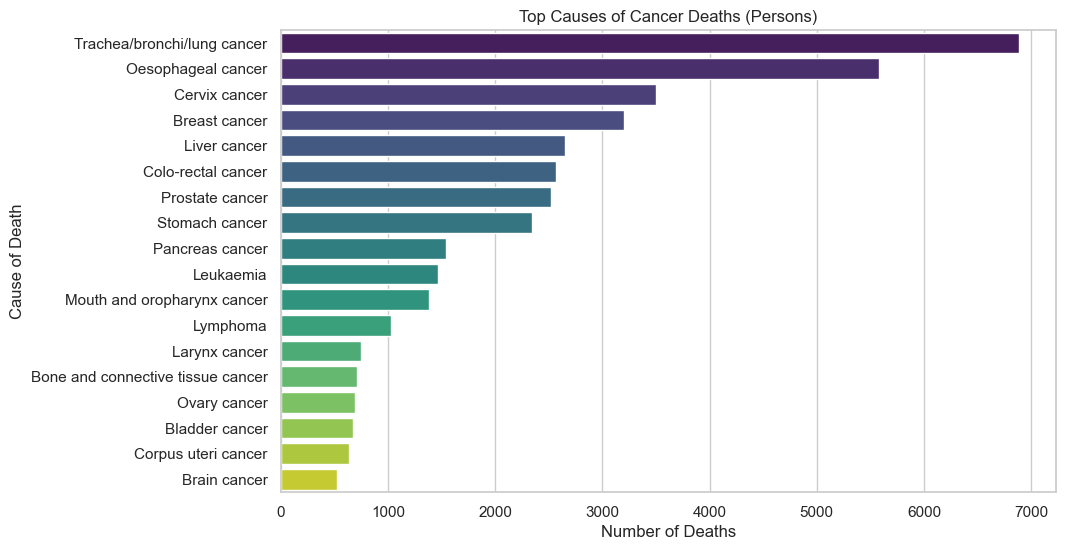

C:\Users\ntabi\AppData\Local\Temp\ipykernel_41896\2259828166.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths_Males', y='Cause_of_Death_Males', data=df, palette='Blues')


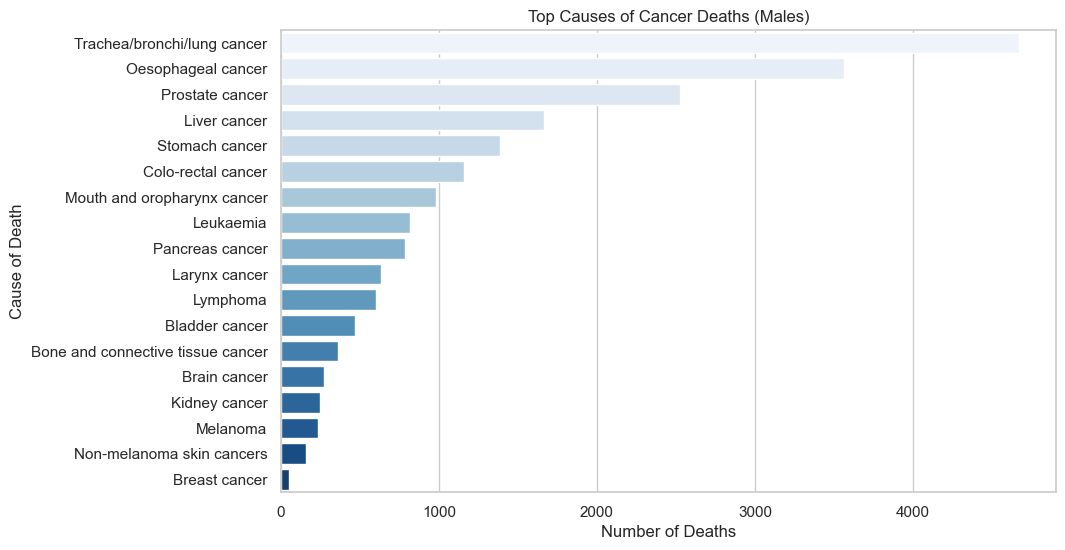

C:\Users\ntabi\AppData\Local\Temp\ipykernel_41896\2259828166.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths_Females', y='Cause_of_Death_Females', data=df, palette='Reds')


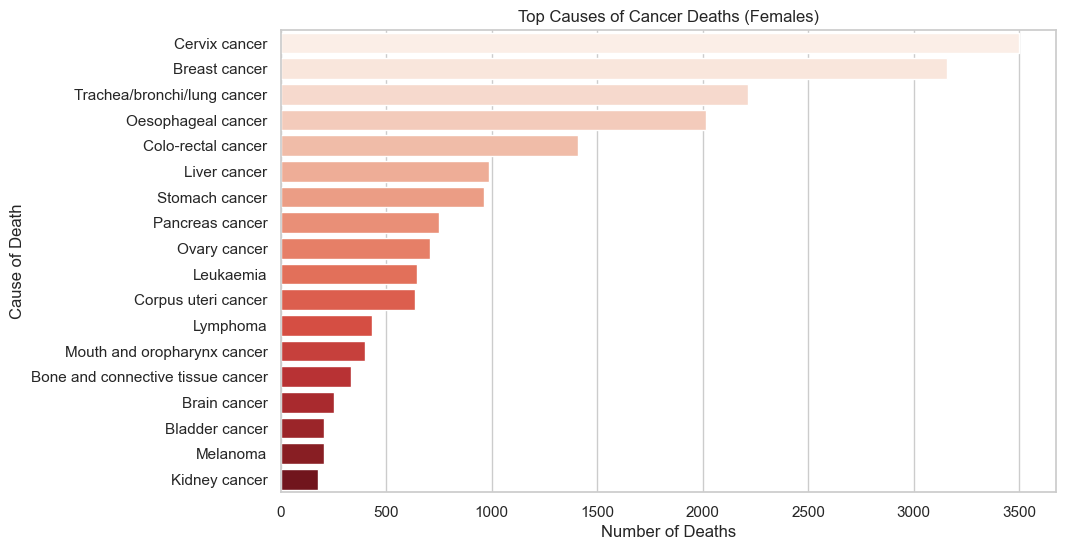

In [12]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot for the general population
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths_Persons', y='Cause_of_Death_Persons', data=df, palette='viridis')
plt.title('Top Causes of Cancer Deaths (Persons)')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.show()

# Plot for Males
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths_Males', y='Cause_of_Death_Males', data=df, palette='Blues')
plt.title('Top Causes of Cancer Deaths (Males)')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.show()

# Plot for Females
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths_Females', y='Cause_of_Death_Females', data=df, palette='Reds')
plt.title('Top Causes of Cancer Deaths (Females)')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.show()


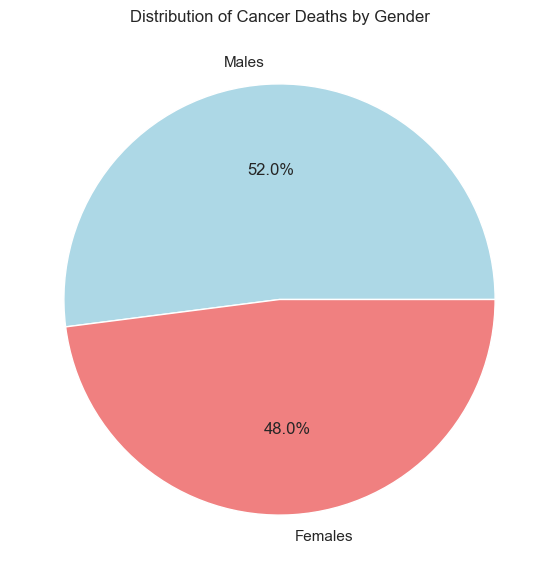

In [13]:
# Calculate the total number of deaths for males and females
total_male_deaths = df['Deaths_Males'].sum()
total_female_deaths = df['Deaths_Females'].sum()

# Create a pie chart
gender_data = [total_male_deaths, total_female_deaths]
gender_labels = ['Males', 'Females']

plt.figure(figsize=(7, 7))
plt.pie(gender_data, labels=gender_labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Cancer Deaths by Gender')
plt.show()


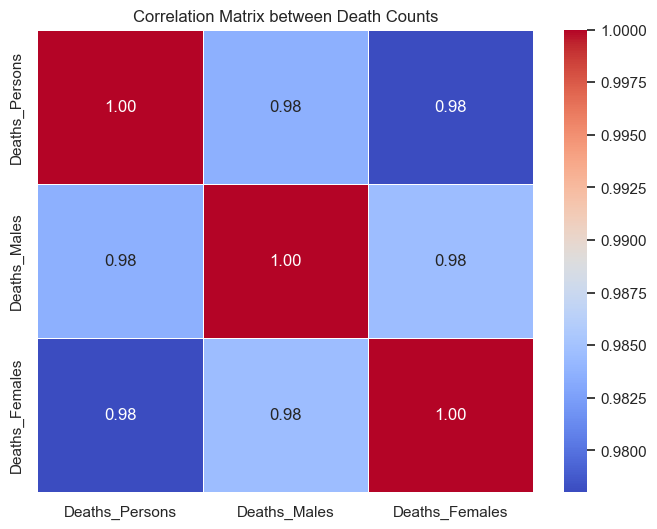

In [14]:
# Calculate the correlation matrix
correlation = df[['Deaths_Persons', 'Deaths_Males', 'Deaths_Females']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Death Counts')
plt.show()


In [15]:
# Rank the top cancer causes for the general population
top_cancers_persons = df[['Cause_of_Death_Persons', 'Deaths_Persons']].sort_values(by='Deaths_Persons', ascending=False)

# Rank the top cancer causes for males
top_cancers_males = df[['Cause_of_Death_Males', 'Deaths_Males']].sort_values(by='Deaths_Males', ascending=False)

# Rank the top cancer causes for females
top_cancers_females = df[['Cause_of_Death_Females', 'Deaths_Females']].sort_values(by='Deaths_Females', ascending=False)

# Display the top cancer causes for each category
print("Top Causes of Cancer Deaths (Persons):")
print(top_cancers_persons.head())

print("\nTop Causes of Cancer Deaths (Males):")
print(top_cancers_males.head())

print("\nTop Causes of Cancer Deaths (Females):")
print(top_cancers_females.head())


Top Causes of Cancer Deaths (Persons):
        Cause_of_Death_Persons Deaths_Persons
0  Trachea/bronchi/lung cancer           6885
1           Oesophageal cancer           5579
2                Cervix cancer           3498
3                Breast cancer           3206
4                 Liver cancer           2651

Top Causes of Cancer Deaths (Males):
          Cause_of_Death_Males Deaths_Males
0  Trachea/bronchi/lung cancer         4669
1           Oesophageal cancer         3566
2              Prostate cancer         2524
3                 Liver cancer         1666
4               Stomach cancer         1386

Top Causes of Cancer Deaths (Females):
        Cause_of_Death_Females Deaths_Females
0                Cervix cancer           3498
1                Breast cancer           3156
2  Trachea/bronchi/lung cancer           2216
3           Oesophageal cancer           2013
4           Colo-rectal cancer           1410
